In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
#load data
dna_meth = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/G5_lung_dna-meth.csv')
# gene_exp = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/G5_lung_gene-expr.csv')

In [69]:
# clin_features = ['Label']
# for col in clin_features:
#     print('---------------------gene expression--------------------------')
#     print(gene_exp[col].value_counts())

# we have 501 tumor samples and 51 normal samples in gene expression data

clin_features = ['Label']
for col in clin_features:
    print('---------------------cpg islands--------------------------')
    print(dna_meth[col].value_counts())

# 370 tumour and 42 normal for dna methylation

---------------------cpg islands--------------------------
Label
Primary Tumor          370
Solid Tissue Normal     42
Name: count, dtype: int64


In [70]:
#describe the data

# print(gene_exp[clin_features].describe())
print()
print(dna_meth[clin_features].describe())


                Label
count             412
unique              2
top     Primary Tumor
freq              370


In [71]:
dna_meth['Label'].values

array(['Solid Tissue Normal', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Solid Tissue Normal', 'Primary Tumor',
       'Solid Tissue Normal', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Primary Tumor', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Solid Tissue Normal', 'Primary Tumor',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Solid Tissue Normal', 'Primary Tumor',
       'Solid Tissue Normal', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Solid Tissue Normal', 'Primary Tumor',
       'Solid Tissue Normal', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Primary Tumor', 'Solid Tissue Normal',
       'Primary Tumor', 'Solid Tissue Normal', 'Primary Tumor',
       'Sol

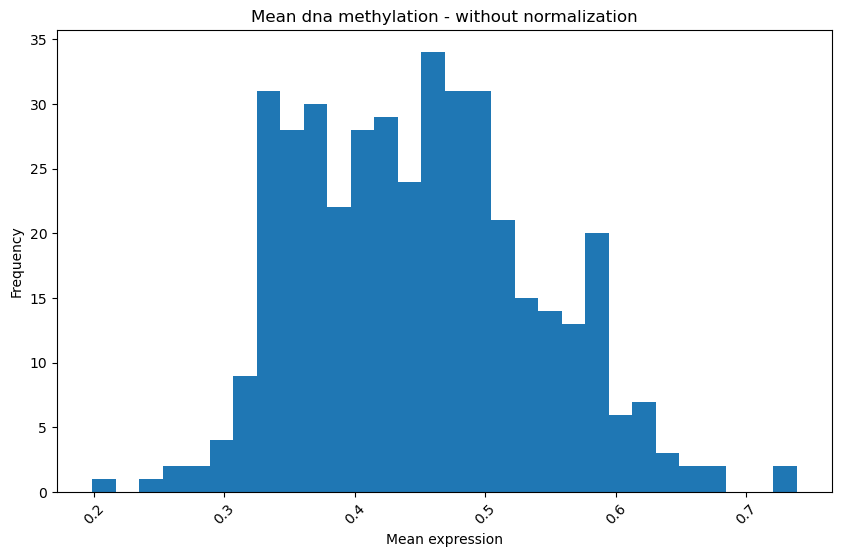

In [76]:
# Convert features to numeric



df = dna_meth
df


column_means = df.iloc[:,3:].mean(axis=1)
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(column_means.values, bins=30)
plt.title('Mean dna methylation - without normalization')
plt.xlabel('Mean expression')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()

In [44]:

#change tissue type into a numeric value
# bool_label = [1 if value == 'Primary Tumor' else 0 for value in df['Label'].values]


#removed this because it's not actually useful in the prediction

In [45]:
# df['Boolean_label'] = bool_label
# df['Boolean_label'].value_counts()

#### 1 is tumour sample, 0 is normal tissue

In [46]:
simple_tissue = []
tissue_num = []
for s in df['Label'].values:
    if 'Primary' in s:
        tissue_num.append(1)
        simple_tissue.append('Primary Tumor')
    else:
        tissue_num.append(0)
        simple_tissue.append('Solid Tissue Normal')

        

df['tissue_numeric'] = tissue_num
df['tissue'] = simple_tissue

In [47]:
df['tissue'].value_counts()
#checking that the same number of samples are in each tissue type

tissue
Primary Tumor          370
Solid Tissue Normal     42
Name: count, dtype: int64

In [48]:
#####NOW WE DO RANDOM FOREST######

numeric_only = df.select_dtypes(include=['number'])
numeric_only = numeric_only.drop(columns=['tissue_numeric']) #dropping this because the sample being cancer or not is not a feature for selection, only for identification later
numeric_only

X = df[numeric_only.columns]
feature_names = X.columns.tolist()
print(feature_names)

['cg00001747', 'cg00002719', 'cg00002749', 'cg00003298', 'cg00009292', 'cg00011616', 'cg00012529', 'cg00018128', 'cg00025439', 'cg00028211', 'cg00034076', 'cg00040312', 'cg00043510', 'cg00061629', 'cg00063174', 'cg00065215', 'cg00073010', 'cg00074145', 'cg00084338', 'cg00100121', 'cg00106345', 'cg00108351', 'cg00114625', 'cg00114913', 'cg00123762', 'cg00129651', 'cg00155310', 'cg00157199', 'cg00158528', 'cg00163372', 'cg00164949', 'cg00166216', 'cg00177787', 'cg00178984', 'cg00186815', 'cg00206414', 'cg00211215', 'cg00215587', 'cg00217080', 'cg00223136', 'cg00225603', 'cg00227584', 'cg00230837', 'cg00249511', 'cg00253658', 'cg00266983', 'cg00268840', 'cg00295572', 'cg00326958', 'cg00332153', 'cg00334063', 'cg00339556', 'cg00347563', 'cg00352218', 'cg00352417', 'cg00357546', 'cg00369811', 'cg00370229', 'cg00377087', 'cg00378950', 'cg00384539', 'cg00397635', 'cg00399591', 'cg00400827', 'cg00406319', 'cg00412368', 'cg00414890', 'cg00415665', 'cg00418216', 'cg00421363', 'cg00423153', 'cg00

In [49]:
y = df['tissue'].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
encoded_Y = labelencoder.fit_transform(y)

#check example
print(y[:50])
print (encoded_Y[:50])

['Solid Tissue Normal' 'Primary Tumor' 'Solid Tissue Normal'
 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Primary Tumor' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Solid Tissue Normal'
 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Solid Tissue Normal'
 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor' 'Solid Tissue Normal'
 'Primary Tumor' 'Solid Tissue Normal' 'Primary Tumor'
 'Solid Tissue Normal' 'Primary Tumor']
[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 

In [50]:
from sklearn.model_selection import train_test_split

print (f'Original X shape is {X.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=42)

print (f'X train shape is    {X_train.shape}')
print (f'y train shape is    {y_train.shape}')
print (f'X test shape is     {X_test.shape}')
print (f'y test shape is     {y_test.shape}')

Original X shape is (412, 5000)
X train shape is    (276, 5000)
y train shape is    (276,)
X test shape is     (136, 5000)
y test shape is     (136,)


In [51]:
X_train

,cg00001747,cg00002719,cg00002749,cg00003298,cg00009292,cg00011616,cg00012529,cg00018128,cg00025439,cg00028211,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
83,0.530354,0.362157,0.493191,0.497213,0.082674,0.825289,0.318641,0.754819,0.912776,0.241447,...,0.969157,0.014713,0.067943,0.271891,0.955552,0.948999,0.959315,0.354484,0.044786,0.929231
233,0.439080,0.372375,0.539408,0.444667,0.440557,0.720779,0.928273,0.390009,0.395551,0.340395,...,0.022525,0.964654,0.448920,0.468137,0.026174,0.942848,0.455287,0.507145,0.474504,0.923575
152,0.018406,0.439832,0.261798,0.443661,0.293650,0.642131,0.457930,0.515681,0.321434,0.794995,...,0.470522,0.012648,0.388154,0.973034,0.023807,0.031298,0.965959,0.549372,0.934573,0.946012
74,0.203641,0.049842,0.803423,0.234811,0.118432,0.666085,0.954547,0.149906,0.693922,0.606442,...,0.957741,0.963498,0.922269,0.016522,0.549725,0.935905,0.454027,0.035528,0.456500,0.922485
208,0.638588,0.346624,0.271380,0.014506,0.088232,0.176593,0.306826,0.035682,0.243192,0.040797,...,0.974611,0.977145,0.219834,0.617636,0.965258,0.968160,0.802889,0.353261,0.958219,0.957519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.050257,0.040843,0.557327,0.325033,0.354202,0.913727,0.974322,0.484390,0.557367,0.746440,...,0.020448,0.342961,0.637252,0.014758,0.498607,0.051308,0.733050,0.472872,0.920886,0.101376
106,0.069179,0.113237,0.474937,0.016846,0.084408,0.395208,0.378231,0.278085,0.630625,0.135607,...,0.974455,0.978303,0.254700,0.013556,0.959703,0.023628,0.234736,0.399207,0.034239,0.454790
270,0.546997,0.022034,0.399498,0.655229,0.474834,0.163868,0.272476,0.662770,0.158910,0.041355,...,0.498497,0.974705,0.035595,0.971909,0.019809,0.461325,0.877137,0.454393,0.573544,0.270448
348,0.310285,0.459386,0.931957,0.331772,0.538442,0.928171,0.674155,0.425237,0.386641,0.533070,...,0.022779,0.975930,0.474716,0.529519,0.019880,0.028535,0.687658,0.632184,0.961451,0.968700


In [52]:
from sklearn.preprocessing import StandardScaler

#log scaling


# X_train = np.where(X_train == 0, 0.01, X_train)
# X_train = np.log2(X_train)

# log2(X_train)

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


cg24504927: 0.038230939638133815
cg21418534: 0.03641769754377462
cg23663774: 0.01962715846723459
cg18082337: 0.019388009636314086
cg22399133: 0.019300409664911755
cg03048654: 0.019280289920167462
cg08190858: 0.019256710617760176
cg04362790: 0.019221782222590775
cg25830182: 0.019167317410620416
cg05970721: 0.01905242703938036
cg05311410: 0.018866285951047678
cg01419831: 0.018767612776481583
cg24495585: 0.01868377379767873
cg17542408: 0.018467002682400514
cg15210851: 0.01827696571014336
cg15126975: 0.0180132131966091
cg26824006: 0.01027211997446281
cg26151206: 0.010173966155410335
cg08364561: 0.01012429165187836
cg02772121: 0.009999999999999992
cg12892506: 0.009986558581743998
cg25857569: 0.00991573795298302
cg04741094: 0.009911577056491564
cg05224741: 0.009824026134122282
cg03457729: 0.009774720358957824
cg14038391: 0.009754694689715205
cg15300436: 0.009743711626064556
cg04021697: 0.009704731613348528
cg05667348: 0.009688571653823282
cg00683332: 0.00968627450980392
cg18698788: 0.0096449

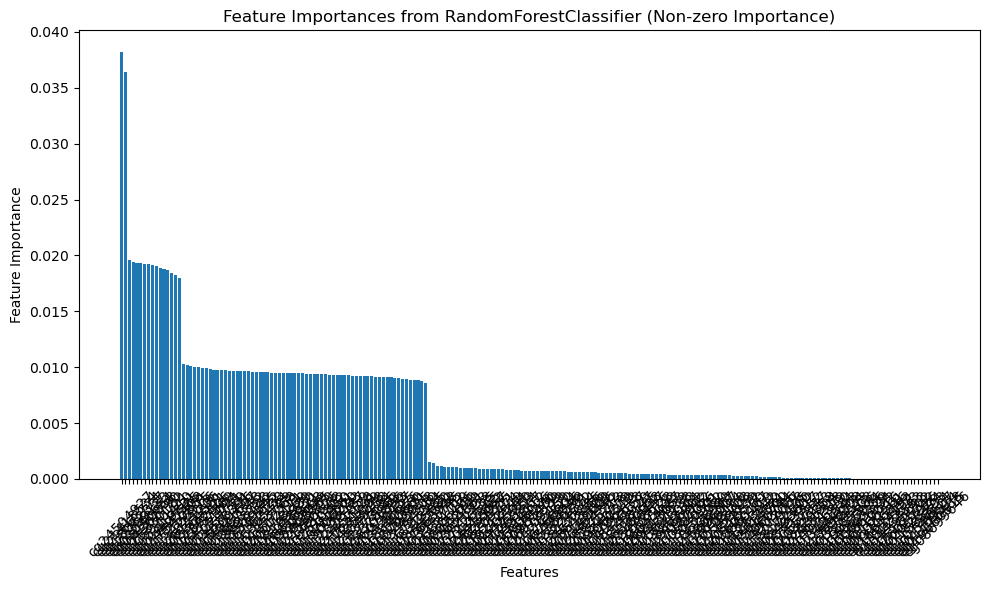

In [53]:
##########random forest##########

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
import numpy as np


forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

feature_importances = forest.feature_importances_

# print (feature_importances)

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]


# Print the feature importances
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(non_zero_indices)), feature_importances[non_zero_indices])
plt.xticks(range(len(non_zero_indices)), [feature_names[i] for i in non_zero_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()


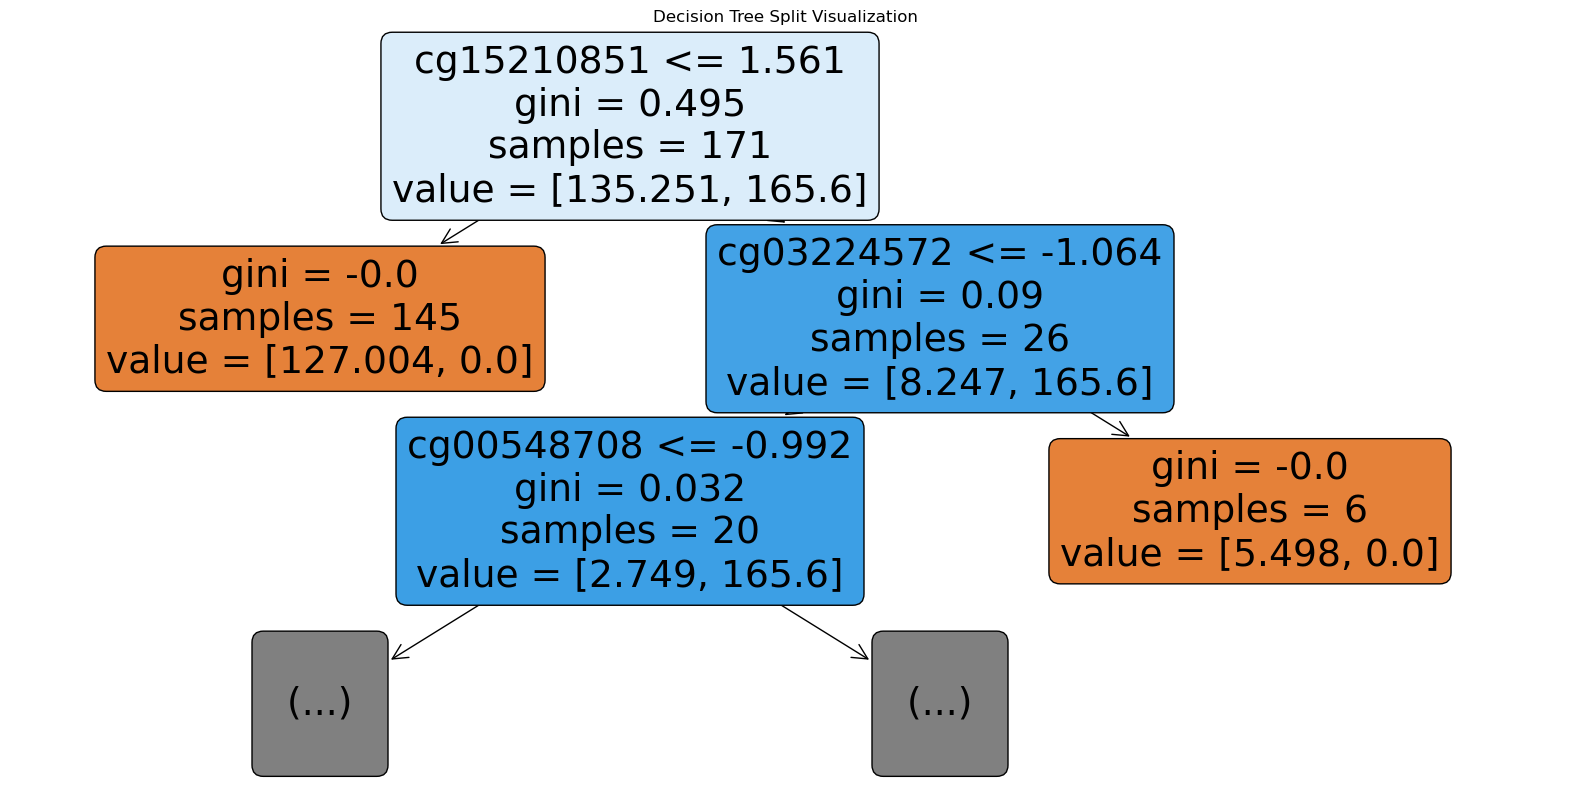

In [54]:
# Plot a single decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[1], feature_names=feature_names, filled=True, rounded=True, max_depth=2)
plt.title("Decision Tree Split Visualization")
plt.show()

In [55]:
from boruta import BorutaPy


# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X_train, y_train)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)  #Apply feature selection and return transformed data

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	5000
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1627
Rejected: 	3373
Iteration: 	9 / 100
Confirmed: 	227
Tentative: 	1400
Rejected: 	3373
Iteration: 	10 / 100
Confirmed: 	227
Tentative: 	1400
Rejected: 	3373
Iteration: 	11 / 100
Confirmed: 	227
Tentative: 	1400
Rejected: 	3373
Iteration: 	12 / 100
Confirmed: 	257
Tentative: 	922
Rejected: 	3821
Iteration: 	13 / 100
Confirmed: 	257
Tentative: 	922
Rejected: 	3821
Iteration: 	14 / 100
Confirmed: 	257
Tentative: 	922
Rejected: 	3821
Iteration: 	15 / 100
Confirmed: 	257
Tentative: 	922
Rejected: 	3821


In [56]:
# # Our feature names
# print (feature_names)

# # True / false values for whether we should accept this feature
# print(feat_selector.support_) 

# # Ranking of the feature (with 1 being the bets)
# print(feat_selector.ranking_)

# Zip feature names, decision, and rankings 
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: cg00001747                     Rank: 1222,  Keep: False
Feature: cg00002719                     Rank: 1185,  Keep: False
Feature: cg00002749                     Rank: 384,  Keep: False
Feature: cg00003298                     Rank: 220,  Keep: False
Feature: cg00009292                     Rank: 2321,  Keep: False
Feature: cg00011616                     Rank: 2077,  Keep: False
Feature: cg00012529                     Rank: 505,  Keep: False
Feature: cg00018128                     Rank: 346,  Keep: False
Feature: cg00025439                     Rank: 2077,  Keep: False
Feature: cg00028211                     Rank: 3964,  Keep: False
Feature: cg00034076                     Rank: 1498,  Keep: False
Feature: cg00040312                     Rank: 810,  Keep: False
Feature: cg00043510                     Rank: 895,  Keep: False
Feature: cg00061629                     Rank: 3964,  Keep: False
Feature: cg00063174                     Rank: 3964,  Keep: False
Feature: cg00065215            

In [57]:
features_true = []
features_true.append('Label')
for each in feature_ranks:
    if each[2] == True:
        features_true.append(each[0])




print(features_true)

['Label', 'cg00217080', 'cg00249511', 'cg00459623', 'cg00519002', 'cg00538017', 'cg00557947', 'cg00683332', 'cg00793935', 'cg00907288', 'cg01140660', 'cg01159194', 'cg01221209', 'cg01377268', 'cg01419831', 'cg01496199', 'cg01518889', 'cg02041108', 'cg02221866', 'cg02303068', 'cg02340083', 'cg02391713', 'cg02510802', 'cg02566698', 'cg02763101', 'cg02772121', 'cg02773086', 'cg02809746', 'cg03048654', 'cg03161803', 'cg03184290', 'cg03192598', 'cg03457729', 'cg03679755', 'cg03714619', 'cg03900143', 'cg04021697', 'cg04209913', 'cg04362790', 'cg04418647', 'cg04425920', 'cg04564920', 'cg04578894', 'cg04607251', 'cg04633922', 'cg04688351', 'cg04704531', 'cg04741094', 'cg04913979', 'cg04915044', 'cg04927931', 'cg04974290', 'cg05057910', 'cg05063520', 'cg05091238', 'cg05224741', 'cg05241355', 'cg05311410', 'cg05369857', 'cg05422029', 'cg05472998', 'cg05482942', 'cg05639246', 'cg05661282', 'cg05667348', 'cg05735180', 'cg05809668', 'cg05926314', 'cg05940691', 'cg05970721', 'cg06060135', 'cg0612287

In [58]:
X_filtered.shape

(276, 294)

Accuracy =  0.9926470588235294


<Axes: >

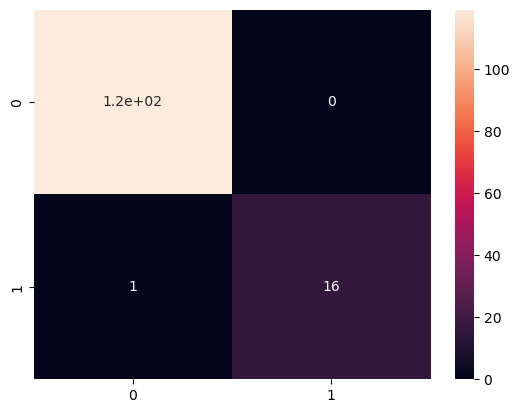

In [59]:
forest.fit(X_filtered, y_train)

#Now predict on test data using the trained model. 

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_forest = forest.predict(X_test_filtered)


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_forest))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_forest)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy (All Features) = 0.9926470588235294


<Axes: >

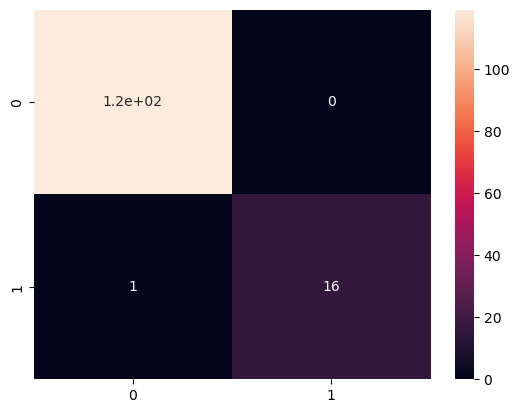

In [60]:
# Train the model with all features
forest.fit(X_train, y_train)

# Test the model with all features
prediction_forest_all = forest.predict(X_test)

# Print overall accuracy for the model with all features
print("Accuracy (All Features) =", metrics.accuracy_score(y_test, prediction_forest_all))

# Confusion Matrix for the model with all features
cm_all = confusion_matrix(y_test, prediction_forest_all)
sns.heatmap(cm_all, annot=True)

In [61]:

###useful to talk about the fact that we have a fairly small sample size so feature selection predictor does not have a lot of normal tissue to work with
#but we would expect normal and cancer tissues to be very different in expression anyway so the accuracy makes sense



#need now to subset original data to only include the features that were selected by boruta




In [62]:
data_selectedFeatures = df.filter(features_true)
data_selectedFeatures

,Label,cg00217080,cg00249511,cg00459623,cg00519002,cg00538017,cg00557947,cg00683332,cg00793935,cg00907288,...,cg27109129,cg27122213,cg27170427,cg27260772,cg27387705,cg27415552,cg27477067,cg27553926,cg27577527,cg27649037
0,Solid Tissue Normal,0.974958,0.037465,0.016025,0.010447,0.922841,0.016606,0.131830,0.049099,0.044032,...,0.054427,0.035260,0.945987,0.035158,0.957169,0.055547,0.045922,0.155473,0.014512,0.976704
1,Primary Tumor,0.345787,0.506162,0.526144,0.476461,0.567461,0.536553,0.484622,0.391362,0.585161,...,0.545435,0.434470,0.492390,0.684921,0.910223,0.451724,0.054950,0.648309,0.364575,0.598100
2,Solid Tissue Normal,0.977933,0.045459,0.014887,0.010953,0.934197,0.019817,0.092420,0.027198,0.088461,...,0.045501,0.054812,0.951820,0.065322,0.965051,0.041996,0.044792,0.064362,0.014630,0.979765
3,Primary Tumor,0.461275,0.515604,0.549600,0.458430,0.578004,0.389403,0.671642,0.563250,0.724215,...,0.495981,0.205216,0.631449,0.702516,0.962932,0.117458,0.534864,0.561418,0.194905,0.451053
4,Solid Tissue Normal,0.982239,0.049626,0.017330,0.018015,0.918643,0.022192,0.114634,0.029018,0.060773,...,0.045296,0.042743,0.939182,0.048796,0.966683,0.053033,0.051762,0.104027,0.019969,0.960829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Primary Tumor,0.132481,0.811733,0.778547,0.023054,0.342237,0.595382,0.914728,0.877801,0.930026,...,0.753637,0.672791,0.912973,0.873089,0.774890,0.637245,0.951449,0.786096,0.027568,0.212446
408,Primary Tumor,0.457911,0.444727,0.527774,0.413623,0.645409,0.133514,0.656820,0.477721,0.634069,...,0.563983,0.346201,0.548379,0.704836,0.469608,0.263138,0.350348,0.610707,0.033770,0.450596
409,Primary Tumor,0.485640,0.635058,0.650819,0.540595,0.559238,0.448874,0.622677,0.680792,0.734660,...,0.663506,0.532793,0.579690,0.809654,0.553118,0.624887,0.594288,0.698898,0.552219,0.379189
410,Primary Tumor,0.977253,0.455155,0.894996,0.019225,0.081857,0.819997,0.926921,0.952403,0.148377,...,0.939192,0.355293,0.900695,0.032576,0.834665,0.928875,0.107014,0.902893,0.846557,0.975073


In [63]:
data_selectedFeatures.to_csv('G5_lung_dna-meth_selected_features.csv')

In [64]:
###### load mystery data


mystery_dna_meth = pd.read_csv(r'/Users/georgiawyldbore/Desktop/UQ_2023/Sem2/BINF7000/Assessment/Assignment2_Student/mystery_dna-meth.csv')


mystery_filtered = mystery_dna_meth.filter(features_true)
mystery_filtered.to_csv('mystery_dna-meth_selected_features.csv')

mystery_dna_meth



,Unnamed: 0,Label,cg00001583,cg00001747,cg00002719,cg00011616,cg00013655,cg00025347,cg00034076,cg00036011,...,cg27527798,cg27538352,cg27539986,cg27546977,cg27553926,cg27583037,cg27592331,cg27623451,cg27633287,cg27649037
0,TCGA.C8.A274.01,Primary Tumor,0.776662,0.809844,0.891880,0.328564,0.849209,0.235096,0.714533,0.048083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA.E2.A572.01,Primary Tumor,0.669769,0.029292,0.761326,0.188135,0.830146,0.308065,0.742329,0.413321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA.AO.A0JA.01,Primary Tumor,0.505964,0.525509,0.806467,0.940331,0.711453,0.328805,0.155193,0.031138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA.E2.A1BD.01,Primary Tumor,0.814448,0.814974,0.902881,0.069385,0.927201,0.225843,0.794465,0.766701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA.AC.A5EH.01,Primary Tumor,0.418687,0.031154,0.449726,0.160170,0.617900,0.605715,0.076246,0.067412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,TCGA.18.5595.11,Solid Tissue Normal,NaN,0.020024,0.019219,0.580281,NaN,NaN,0.062250,NaN,...,0.807542,0.977556,0.143700,0.130896,0.065430,0.034557,0.269848,0.962175,0.930841,0.973963
376,TCGA.39.5036.11,Solid Tissue Normal,NaN,0.037856,0.019365,0.479544,NaN,NaN,0.094240,NaN,...,0.840923,0.978938,0.082066,0.113188,0.099127,0.049164,0.342877,0.949303,0.659989,0.980929
377,TCGA.22.5492.11,Solid Tissue Normal,NaN,0.017807,0.024142,0.301080,NaN,NaN,0.098974,NaN,...,0.829504,0.980464,0.098895,0.198826,0.081321,0.024921,0.190175,0.956378,0.942248,0.972996
378,TCGA.22.5477.11,Solid Tissue Normal,NaN,0.029362,0.016582,0.497647,NaN,NaN,0.082672,NaN,...,0.884962,0.971747,0.081415,0.148806,0.113125,0.044641,0.331803,0.953369,0.897109,0.970955


In [65]:
mystery_filtered

,Label,cg00217080,cg00249511,cg00459623,cg00519002,cg00538017,cg00557947,cg00683332,cg00793935,cg00907288,...,cg27109129,cg27122213,cg27170427,cg27260772,cg27387705,cg27415552,cg27477067,cg27553926,cg27577527,cg27649037
0,Primary Tumor,0.165724,NaN,0.866799,NaN,NaN,0.870655,NaN,NaN,0.869151,...,0.862428,0.769763,0.176475,0.201685,NaN,0.090750,0.060070,NaN,NaN,NaN
1,Primary Tumor,0.241225,NaN,0.039894,NaN,NaN,0.490065,NaN,NaN,0.298918,...,0.349454,0.758911,0.294390,0.882793,NaN,0.933388,0.207723,NaN,NaN,NaN
2,Primary Tumor,0.268458,NaN,0.571504,NaN,NaN,0.468906,NaN,NaN,0.926706,...,0.022220,0.728070,0.359532,0.517306,NaN,0.090194,0.052560,NaN,NaN,NaN
3,Primary Tumor,0.794444,NaN,0.750780,NaN,NaN,0.404369,NaN,NaN,0.392160,...,0.852664,0.829449,0.365457,0.057295,NaN,0.242321,0.852739,NaN,NaN,NaN
4,Primary Tumor,0.350791,NaN,0.643861,NaN,NaN,0.468383,NaN,NaN,0.649387,...,0.593300,0.043877,0.294043,0.053517,NaN,0.106875,0.497910,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Solid Tissue Normal,0.962214,0.026738,0.018646,0.015381,0.947393,0.020609,0.104136,0.095555,0.102108,...,0.032571,0.047215,0.949048,0.052628,0.955089,0.057600,0.074006,0.065430,0.016167,0.973963
376,Solid Tissue Normal,0.977677,0.062880,0.013321,0.008874,0.925085,0.019039,0.069740,0.113303,0.122265,...,0.079825,0.053808,0.941510,0.054628,0.966640,0.039550,0.055551,0.099127,0.022299,0.980929
377,Solid Tissue Normal,0.975736,0.039931,0.017940,0.015747,0.947269,0.025885,0.168753,0.052505,0.067926,...,0.051370,0.067603,0.924342,0.045163,0.954079,0.045779,0.048139,0.081321,0.015286,0.972996
378,Solid Tissue Normal,0.977278,0.035647,0.022311,0.012381,0.936814,0.027925,0.066192,0.043795,0.066370,...,0.054895,0.057686,0.931937,0.072225,0.958788,0.059266,0.078034,0.113125,0.016516,0.970955
